# 📊 Project: Exploring NYC Taxi Data in 2016 with Python

## Introduction
- Thesedays, with the high population density in `New York City (NYC)`, ***for-hire vehicles*** have become a convenient and comfortable option for people <span style = "color:red;"> who need to travel, who do not own a car,want to avoid finding parking lot, commute for work or study. 
- In this project, i am going to work as a Data Analyst to explore and analyze a small "NYC Taxi" dataset.
- The purpose of this EDA is to determine:
    1. ***How many taxi trips were taken in a particular month?***
    2. ***Which is the busiest airport?***
    3. ***What are the averages for trip distance, trip length, and total amount for rides under a particular speed?***

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import calendar
from matplotlib import pyplot as plt
from collections import defaultdict
from IPython.display import display, Markdown # In kết quả tô đậm bằng Markdown


## Table of Contents
1. [Project](#Project:Exploring-NYC-Taxi-Data-in-2016-with-Python)
    * [Introduction](#Introduction)
    * [Table of Contents](#Table-of-Contents)
    * [Data Descriptions](#Descriptions-of-columns)
    * [Mapping Table](#Mapping-Table)
2. [Data Exploration](#Data-Exploration)
    * [Data Quality Report](#Data-Quality-Report)
    * [NYC Taxi Data: Taxi Trips and Time Patterns](#NYC-Taxi-Data-Taxi-Trips-and-Time-Patterns)
        * [Number of Pickups in a Specific Month](#Number-of-pickups-in-a-specific-month)
        * [Taxi Trips by Months Overview](#Taxi-Trips-by-Month-Overview)
        * [Highest Date in a month](#The-date-in-a-month-with-the-highest-number-of-trips)
    * [NYC Taxi Data: Analyzing Airport Pickup Traffic in the US](#Analyzing-Airport-Pickup-Traffic-in-the-US)
        * [Taxi Pickups Overview](#Taxi-Pickups-Overview)
        * [Revenues of Airports with Payment Method](#Revenues-of-Airports-with-Payment-Method)
3. [Average Metrics for a trip](#Calculating-averages-for-trip-distance,-trip-length-and-total-amount-for-rides-under-a-particular-speed)
4. [Conclusion](#Conclusion)
       

## Descriptions of columns
- 📅 ***pickup_year***: Trip's year
- 📅 ***pickup_month***: Trip's month (January is 1, December is 12)
- 📅 ***pickup_day**: Trip's day of the month
- 📍 ***pickup_location_code***: Starting airport or borough
- 📍 ***dropoff_location_code***: Ending airport or borough
- 📏 ***trip_distance***: Trip distance in miles
- ⏱️ ***trip_length***: Trip length in seconds
- 💵 ***fare_amount***: Base fare in dollars
- 💰 ***total_amount***: Total amount charged, including all fees, tolls, and tips

## Mapping Table

|Code   |🗺️ Pickup_Location_Code|⏰ Pick_Up_Time |💳 Payment_Type|
|:-----:|:----                  |:----         |:----       |
|0      |Bronx                  |0:00AM-3:59AM |#NA         |
|1      |Brooklyn               |4:00AM-7:59AM |Credit Card |
|2      |JFK                    |8:00AM-11:59AM|Cash        |
|3      |LaGuardia              |12:00PM-3:59PM|No carge    |
|4      |Manhattan              |4:00PM-7:59PM |Dispute     |
|5      |Newark Airport         |8:00PM-11:59PM|#NA         |
|6      |Queens                 |#NA           | #NA        |
|7      |Staten Island          |#NA           | #NA        |


# Data Exploration

- The URL of the dataset: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page
 `[This dataset includes a 1/50th random sample of all trips between January and June 2016 that either start or end at an aiport location.]`
- The data dictionary: https://s3.amazonaws.com/dq-content/290/nyc_taxi_data_dictionary.md
- The date of the data from Jan 2016 to July 2016

In [2]:
taxi = np.genfromtxt('nyc_taxis.csv',dtype=int,delimiter = ',', skip_header=1)

* <span style="color: red;"> Note: Using set_printoptions to determine the way floating point numbers, arrays and other NumPy objects are displayed.

In [3]:
np.set_printoptions(precision=2,suppress=True)

## Data Quality Report

In [4]:
TAXI = pd.read_csv('C:/Users/admin/Documents/DATA ANALYST/Project/2025/Python In DA/II_Pandas/nyc_taxis/nyc_taxis.csv')

In [5]:
display(TAXI)

,pickup_year,pickup_month,pickup_day,pickup_dayofweek,pickup_time,pickup_location_code,dropoff_location_code,trip_distance,trip_length,fare_amount,fees_amount,tolls_amount,tip_amount,total_amount,payment_type
0,2016,1,1,5,0,2,4,21.00,2037,52.0,0.8,5.54,11.65,69.99,1
1,2016,1,1,5,0,2,1,16.29,1520,45.0,1.3,0.00,8.00,54.30,1
2,2016,1,1,5,0,2,6,12.70,1462,36.5,1.3,0.00,0.00,37.80,2
3,2016,1,1,5,0,2,6,8.70,1210,26.0,1.3,0.00,5.46,32.76,1
4,2016,1,1,5,0,2,6,5.56,759,17.5,1.3,0.00,0.00,18.80,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,2016,6,30,4,5,3,4,9.50,1989,31.0,1.3,5.54,3.00,40.84,1
2009,2016,6,30,4,5,2,4,19.80,2368,52.0,0.8,5.54,0.00,58.34,1
2010,2016,6,30,4,5,2,4,17.48,2822,52.0,0.8,5.54,5.00,63.34,1
2011,2016,6,30,4,5,2,6,12.76,1083,34.5,1.3,0.00,8.95,44.75,1


The dataset contains `2013 rows` and `15 columns`

In [6]:
def check_quality_data(df,column):
    quality_report = {
        "null_values": df.isnull().sum().to_dict(),
        "duplicate_values": df.duplicated().sum(),
        "unique_values": len(df[column].unique()),
        "total_rows": len(df),
        "dtype_columns": df.dtypes
    }
    return quality_report

In [7]:
quality_report = check_quality_data(df=TAXI,column="pickup_year")
display(quality_report)

{'null_values': {'pickup_year': 0,
  'pickup_month': 0,
  'pickup_day': 0,
  'pickup_dayofweek': 0,
  'pickup_time': 0,
  'pickup_location_code': 0,
  'dropoff_location_code': 0,
  'trip_distance': 0,
  'trip_length': 0,
  'fare_amount': 0,
  'fees_amount': 0,
  'tolls_amount': 0,
  'tip_amount': 0,
  'total_amount': 0,
  'payment_type': 0},
 'duplicate_values': 0,
 'unique_values': 1,
 'total_rows': 2013,
 'dtype_columns': pickup_year                int64
 pickup_month               int64
 pickup_day                 int64
 pickup_dayofweek           int64
 pickup_time                int64
 pickup_location_code       int64
 dropoff_location_code      int64
 trip_distance            float64
 trip_length                int64
 fare_amount              float64
 fees_amount              float64
 tolls_amount             float64
 tip_amount               float64
 total_amount             float64
 payment_type               int64
 dtype: object}

There is no need to clean the dataset 

## NYC Taxi Data Taxi Trips and Time Patterns

Let's move on to answer the first question: ***How many taxi trips were taken in a particular month?***

- To calculate the number of taxi trips in each month <span style="color: red;"> ***which months have the highest or lowest demand for-hire tax services***.
- I'm going to do it for some steps:
    + Step 1: Creating a `defaultdict(int)` to count the frequency values in each month
    + Step 2: Loop through dataset to
    + Step 3: Using syntax: ***calender.month_name[number]*** to convert to month_name => 1 -> "January"
    + Step 4: `counts_by_month[month_name]` works like this - if `month_name` is already in the dictionary => +=1; if not in => set to 1

<span style="color:red;">*** Note: you can also create a def(freq_table) function || using value_counts in pandas (remember the type)

In [8]:
counts_by_month = defaultdict(int)
for row in taxi:
    month_number = row[1]
    month_name = calendar.month_name[month_number]
    counts_by_month[month_name] +=1 
counts_by_month = dict(counts_by_month)

#display the result
display(Markdown(f"Total trips by month: ***{counts_by_month}***"))

Total trips by month: ***{'January': 800, 'February': 176, 'March': 554, 'April': 171, 'June': 312}***

# Visualiztion: Piechart

To visualize the ***piechart*** with the percentage for each month in the first half of 2016, i will convert `counts_by_month` dictionary to 2-D for use with Matplotlib.

In [9]:
counts_by_month = np.array(list(counts_by_month.items()))
month_name = counts_by_month[:,0]
taxi_trips = counts_by_month[:,1]

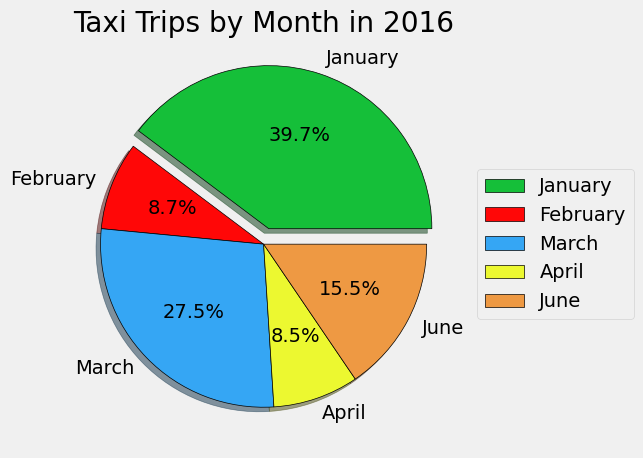

In [10]:
#plt.style.available
explode = [0.1,0,0,0,0]
colors = ['#15bf39','#ff0707','#35a6f4','#ecf830','#ee9943']
plt.style.use('fivethirtyeight')
plt.pie(taxi_trips,explode=explode,labels = month_name, autopct='%1.1f%%',
        colors=colors, shadow=True, wedgeprops = {'edgecolor':'black'})

plt.title("Taxi Trips by Month in 2016")
plt.grid()
plt.tight_layout()
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
#plt.savefig('PieChartTaxi.png')
plt.show()

### Number of pickups in a specific month

I'm curious to know which airports had the ***highest number of pickups each month and why***. 

- ✈️ To calculate the number of pickups in a specific month and determine which aiports had the highest number of pickups, i will create a function called ***airport_month*** that takes `4 parameters`:
     1. `Dataset`: the NYC Taxi dataset
     2. `Aiport_index`: the index of pickup location code (explained in the mapping table)
     3. `month_index`: the index of the "month" column
     4. `m_number`: the month number to filter (eg: 1 for January, 2 for February,etc)
* Calculating process:
    - Step 1: Create a `defaultdict` to count the frequency of pickups at each aiport.
    - Step 2: Loop thourgh the dataset to extract the airport code and month number.
    - Step 3: Use if condition: if ***month_number*** matches ***m_number*** => Dictionary +=1

In [11]:
def airport_month(dataset, airport_index, month_index, m_number):
    from collections import defaultdict
    airport_name = {0:"Bronx", 1:"Brooklyn", 2:"JFK", 3:"LaGuardia", 4:"Manhattan",5:"Newark_Airport",6:"Queens",7:"Staten_Island"}
    airport_count = defaultdict(int)
    for row in dataset:
        airport_code = row[airport_index]
        month_number = row[month_index]
        if month_number == m_number and  airport_code in airport_name:
            name = airport_name[airport_code]
            airport_count[name] += 1
    airport_count = dict(airport_count)
    return airport_count

In [12]:
Jan_airport = airport_month(taxi,5,1,1) #January
Feb_airport = airport_month(taxi,5,1,2) #Feb
Mar_airport = airport_month(taxi,5,1,3) #March
Apr_airport = airport_month(taxi,5,1,4) #April
Jun_airport = airport_month(taxi,5,1,6) #June

In [13]:
display(f"January: {Jan_airport}")
display(f"February: {Feb_airport}")
display(f"March: {Mar_airport}")
display(f"April: {Apr_airport}")
display(f"June: {Jun_airport}")

"January: {'JFK': 330, 'Manhattan': 185, 'Queens': 8, 'Brooklyn': 1, 'LaGuardia': 276}"

"February: {'Manhattan': 51, 'JFK': 60, 'LaGuardia': 64, 'Queens': 1}"

"March: {'JFK': 162, 'LaGuardia': 210, 'Manhattan': 173, 'Queens': 6, 'Bronx': 1, 'Brooklyn': 2}"

"April: {'LaGuardia': 78, 'Manhattan': 30, 'JFK': 63}"

"June: {'Manhattan': 74, 'JFK': 109, 'LaGuardia': 127, 'Queens': 1, 'Brooklyn': 1}"

### Taxi Trips by Month Overview
- During the six-month period in 2016, NYC FHV(For-hire vehicle) services showed trends:
> - In ***January*** and ***March***, FHV usage was high, which accounting for `39.7%` and `27.5%` of the total trips, with `880` and `554` services used by passengers, respectively. Additionally, **JFK**(`330 trips`) and **LaGuardia**(`210 trips`) recorded the highest number of taxi trips during these months.
> - ***June*** followed in the third place took up to `15,5%` of the total trips (`312 trips`), with **LaGuardia** attracting mostly customers
> - ***February*** & ***April*** were the least in taxi trips with a `less than 10%`
- <span style="color:red;"> Overall, across all months, ***JFK*** and ***LaGuardia*** airports had the higher number of taxi trips compared to other aiports.

## The date in a month with the highest number of trips

Let's dig deeper inside the chart. I'm quite curious that <span style="color:red;">***which is a busiest day in a month***

- Calculating process:
    - Step 1: Select all columns for a given set of rows from Ndarrays `[day,month,year]`.
    - Step 2: Create a `defaultdict` called "counts_by_date" to count the frequency in each date
    - Step 3: Loop thourgh new dataset from step 1 by using zip() function to  connect the three lists and format them as (day/month/year) dates.
    - Step 4: If date already in the dictionary, increment 1. If it isn't, equal 1.

In [14]:
pickup_day = taxi[:,2]
pickup_month = taxi[:,1]
pickup_year = taxi[:,0]

counts_by_date = defaultdict(int)
for day,month,year in zip(pickup_day,pickup_month,pickup_year): # Eg: [(1, 'Jan', 2023), (2, 'Feb', 2023), (3, 'Mar', 2023)]
    date = f"{day}/{month}/{year}"
    counts_by_date[date] +=1
counts_by_date = dict(counts_by_date)
display(counts_by_date)

{'1/1/2016': 367,
 '2/1/2016': 31,
 '4/1/2016': 191,
 '5/1/2016': 110,
 '22/1/2016': 101,
 '13/2/2016': 176,
 '3/3/2016': 18,
 '4/3/2016': 183,
 '23/3/2016': 151,
 '28/3/2016': 126,
 '30/3/2016': 76,
 '24/4/2016': 171,
 '30/6/2016': 312}

📅I have a dictionary where {key} is date and {values} represents number of taxi trips. Now,let's to find out the date in each month that has the highest number of trips.

- First of all, I'm going to create a dictionary that stores ***{month_year,(date,trips)}***.
- Loop through the dictionary above to extract month/year for ***month_key***.
- Inside the loop, i'll use `if statement` to say: 
    - If ***month_year*** already in the dictionary and current date's number of trips is greater=> Update date,trips to the dictionary.
    - If ***month_year*** isn't in the dictionary => Add to the dict with (date,trips)

In [15]:
months_max = {}
for date,trips in counts_by_date.items():
    day,month,year = date.split("/")
    month_year = f"{month}/{year}"
    
    if (month_year in months_max) and (months_max[month_year][1] < trips):
        months_max[month_year] = (date,trips)
    elif month_year not in months_max:
        months_max[month_year] = (date,trips)
print(months_max)

for month,(top_date,max_trips) in months_max.items():
    display(Markdown(f"📅 {month}: The date with highest number of trips was `{top_date}`,with **{max_trips}**."))

{'1/2016': ('1/1/2016', 367), '2/2016': ('13/2/2016', 176), '3/2016': ('4/3/2016', 183), '4/2016': ('24/4/2016', 171), '6/2016': ('30/6/2016', 312)}


📅 1/2016: The date with highest number of trips was `1/1/2016`,with **367**.

📅 2/2016: The date with highest number of trips was `13/2/2016`,with **176**.

📅 3/2016: The date with highest number of trips was `4/3/2016`,with **183**.

📅 4/2016: The date with highest number of trips was `24/4/2016`,with **171**.

📅 6/2016: The date with highest number of trips was `30/6/2016`,with **312**.

## Analyzing Airport Pickup Traffic in the US

In [16]:
def pick_up_airport(dataset,col_index,code):
    airport = dataset[dataset[:,col_index] == code]
    airport_count = airport.shape[0]
    return airport_count

In [17]:
Bronx = pick_up_airport(taxi,5,0)
Brooklyn = pick_up_airport(taxi,5,1)
JFK = pick_up_airport(taxi,5,2)
LaGuardia = pick_up_airport(taxi,5,3)
Manhattan = pick_up_airport(taxi,5,4)
Newark_Airport = pick_up_airport(taxi,5,5)
Queens = pick_up_airport(taxi,5,6)
Staten_Island = pick_up_airport(taxi,5,7)

In [18]:
airports = np.array(["Bronx","Brooklyn","JFK","LaGuardia","Manhattan","Newark_Airport","Queens","Staten_Island"])
pick_ups = np.array([Bronx,Brooklyn,JFK,LaGuardia,Manhattan,Newark_Airport,Queens,Staten_Island])

airport_traffic = dict(zip(airports,pick_ups))
sorted_traffic = sorted(airport_traffic.items(),key=lambda x:x[1],reverse=True)
display(sorted_traffic)

[('LaGuardia', 755),
 ('JFK', 724),
 ('Manhattan', 513),
 ('Queens', 16),
 ('Brooklyn', 4),
 ('Bronx', 1),
 ('Newark_Airport', 0),
 ('Staten_Island', 0)]

In [19]:
display(Markdown(f"**{airports[pick_ups.argmax()]}** Airport has the most **{pick_ups.max()}** taxi trips in half of 2016"))

**LaGuardia** Airport has the most **755** taxi trips in half of 2016

# Visualization: Bar Chart

In [20]:
pick_ups = []
airports = []
for aprt, pickups in sorted_traffic:
    airports.append(aprt)
    pick_ups.append(pickups)

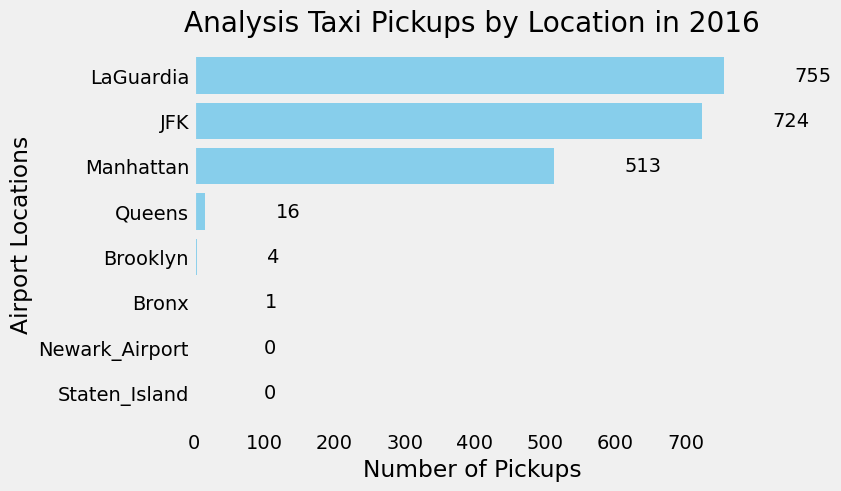

In [21]:
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(y[i] + 100, i, str(y[i]), va='center')
plt.style.use('fivethirtyeight')

#Reverse
pick_ups.reverse()
airports.reverse()
#Creating and Data for 
plt.barh(airports,pick_ups,color="Skyblue")
add_labels(airports,pick_ups)

# Adding title, labels
plt.title("Analysis Taxi Pickups by Location in 2016")
plt.ylabel("Airport Locations")
plt.xlabel("Number of Pickups")

#Display the chart
plt.grid()
#plt.savefig('Barhchart.png')
plt.show()

### Taxi Pickups Overview
 - Generally, ***LaGuardian, JFK, Mahattan*** were the top pickup locations, accounting for `1,992 trips out of 2,013`- <span style="color:red;"> ***which reflects a significant concentration of taxi traffic than other airports in the dataset***.
    > - 👉 There are two possible reasons for this traffic. First one is the holiday travel during chirstmast and New Year. Additionally, on January 20-22, people were affected by the blizzard,  because of safety condition, they were choosing the taxi services.
    > - 🔒 Link: https://en.wikipedia.org/wiki/January_2016_United_States_blizzard 
    
- Taxi Pickups from `Queens`, `Brooklyn`, `Bronx`, `Newark` and `Statent Island` airports are surprisingly low - fewer than 20 recorded trips. <span style="color:red;"> ***The reason due to the limitations in the dataset i downloaded. As a result, it's impossible to analyze these airports***.

### Revenues of Airports with Payment Method

Before moving to the final question,i'm going to calculate the revenue of each aiports with the payment type

In [22]:
TAXI.head(2)

,pickup_year,pickup_month,pickup_day,pickup_dayofweek,pickup_time,pickup_location_code,dropoff_location_code,trip_distance,trip_length,fare_amount,fees_amount,tolls_amount,tip_amount,total_amount,payment_type
0,2016,1,1,5,0,2,4,21.00,2037,52.0,0.8,5.54,11.65,69.99,1
1,2016,1,1,5,0,2,1,16.29,1520,45.0,1.3,0.00,8.00,54.30,1


In [23]:
# Copy dataframe
s = TAXI.copy()

#Rename columns or index labels
s = s.rename(columns={"pickup_location_code":"airport_code", "total_amount":"revenues","payment_type":"payment_code"})
s.loc[:,["airport_code","revenues","payment_code"]]

#Create a column "airport_name", "payment_method"
code_to_name = {0:"Bronx", 1:"Brooklyn", 2:"JFK", 3:"LaGuardia", 4:"Manhattan",5:"Newark_Airport",6:"Queens",7:"Staten_Island"}
s["airport_name"] = s["airport_code"].map(code_to_name) #map(dict) sẽ tra cứu từng giá trị trong airport_code và trả về tên tương ứng từ dictionary.

code_to_payment = {1: "Credit Card",2: "Cash",3: "No Charge",4: "Dispute",5: "Unknown",6: "Voided Trip"}
s["payment_method"] = s["payment_code"].map(code_to_payment)



#remove unnecessary columns
s = s.drop(['pickup_year','pickup_month','pickup_day','pickup_dayofweek','pickup_time','dropoff_location_code','trip_distance','trip_length','fare_amount','fees_amount','tolls_amount','tip_amount'], axis=1)

#Display result
s.head()

,airport_code,revenues,payment_code,airport_name,payment_method
0,2,69.99,1,JFK,Credit Card
1,2,54.30,1,JFK,Credit Card
2,2,37.80,2,JFK,Cash
3,2,32.76,1,JFK,Credit Card
4,2,18.80,2,JFK,Cash


# Visualization: Stacked BarChart

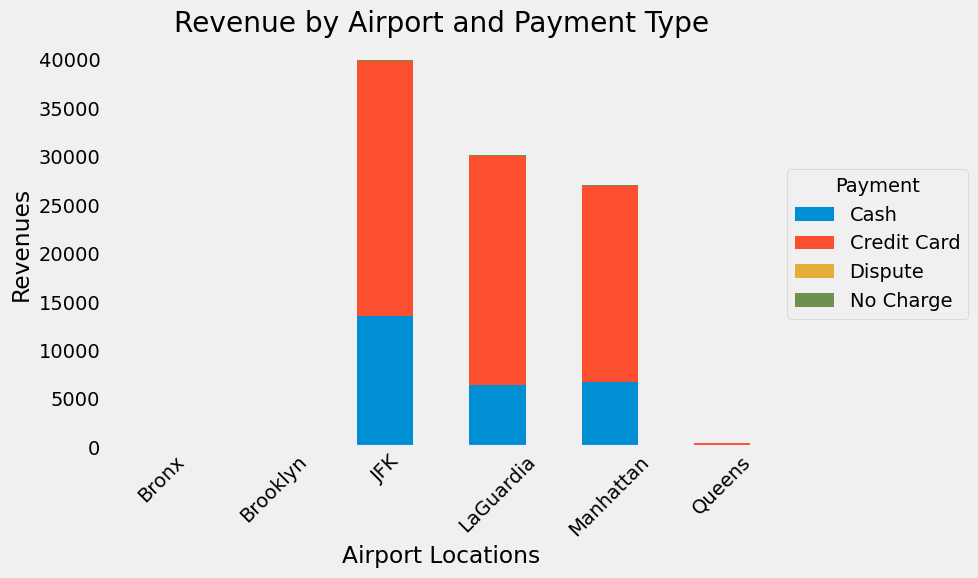

In [24]:
grouped = s.groupby(["airport_name","payment_method"])["revenues"].sum().unstack(fill_value=0)

#Stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

#Title, x-label, y-label
plt.title("Revenue by Airport and Payment Type")
plt.xlabel("Airport Locations")
plt.ylabel("Revenues")
plt.xticks(rotation=45)

#decoration
plt.legend(title="Payment",loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.grid()

#display the result
#plt.savefig("RevenueStackedBarChart.png")
plt.show()

# Calculating averages for trip distance, trip length and total amount for rides under a particular speed

In [25]:
trip_distance = taxi[:,7]
trip_length = taxi[:,8]
trip_mph = (trip_distance / (trip_length/3600))

#Under a particular speed means meet safe speed < 100 mph
safe_speed = taxi[trip_mph <100]

mean_distance = safe_speed[:,7].mean()
mean_length = safe_speed[:,8].mean()
mean_total = safe_speed[:,13].mean()

In [26]:
print(f"Average trips with safe speed: {mean_distance:.2f}")
print(f"Average trip lenghts in minutes: {mean_length/60:.2f}")
print(f"Average total  per trip: $ {mean_total:.2f}")

Average trips with safe speed: 12.44
Average trip lenghts in minutes: 37.86
Average total  per trip: $ 48.20


# Visualiztion: Histogram Chart

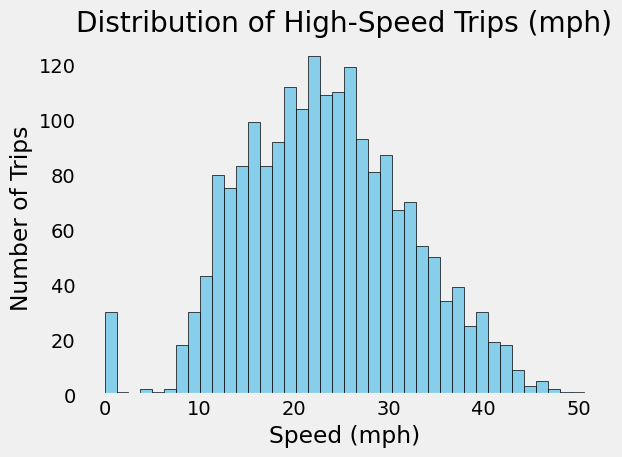

In [27]:
plt.hist(trip_mph[trip_mph<200], bins=40, color="Skyblue", edgecolor="black")

plt.title("Distribution of High-Speed Trips (mph)")
plt.xlabel("Speed (mph)")
plt.ylabel("Number of Trips")

plt.grid()
plt.tight_layout()
plt.show()

# Conclusion

- The project focused on analyzing the NYC Taxi dataset to explore:
> - ***Taxi Traffic Trends by months***
> - ***The concentration of taxi traffic***
> - ***The average metrics of a trip for customers***.
- Avoiding speed above is necessary for safety, luckily in the dataset just only 9 cases.Additionally, the analysis of taxi revenue by airport and payment method shows that `JFK`, `LaGuardia`,`Manhattan` generated high incomes. This also <span style="color:red;"> reflects the customers' behavior for mostly using credit card for payment. In contrast, due to limitations in dataset, we can't know the other aiport locations: `Bronx`,`Brooklyn` and `Queens`. 
- Recommendations based on the findings include:
> - Improve vehicle distribution during peak months 
> - Invest marketing strategies(eg: discounts) to encourage the use of For-Hire Vehicles(FHV) services
> - Collaborate with local business or events to boost ride demand
> - Reinforce speed policies